In [0]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')

In [55]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

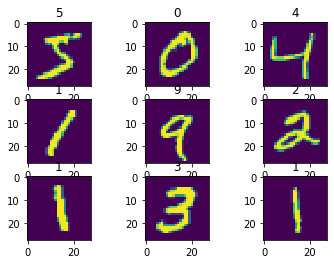

In [56]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i])
    plt.title(y_train[i])

In [57]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [0]:
numClasses = 10

Y_train = np_utils.to_categorical(y_train, numClasses)                          #One hot Encoding
Y_test = np_utils.to_categorical(y_test, numClasses)

In [0]:
model = Sequential()

model.add(Dense(1024, input_shape=(X_train.shape[1],)))
model.add(Activation('relu')) 
model.add(Dropout(0.5))   

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [61]:
model.fit(X_train, Y_train,batch_size=128, epochs=10, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 341us/step - loss: 0.3204 - val_loss: 0.1237
Epoch 2/10
60000/60000 [==============================] - 19s 324us/step - loss: 0.1519 - val_loss: 0.0961
Epoch 3/10
60000/60000 [==============================] - 19s 324us/step - loss: 0.1226 - val_loss: 0.0819
Epoch 4/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.1044 - val_loss: 0.0728
Epoch 5/10
60000/60000 [==============================] - 19s 323us/step - loss: 0.0914 - val_loss: 0.0638
Epoch 6/10
60000/60000 [==============================] - 19s 324us/step - loss: 0.0827 - val_loss: 0.0680
Epoch 7/10
60000/60000 [==============================] - 19s 323us/step - loss: 0.0742 - val_loss: 0.0639
Epoch 8/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.0688 - val_loss: 0.0644
Epoch 9/10
60000/60000 [==============================] - 19s 321us/step - loss: 0.0662 - val_

In [62]:
model.evaluate(X_test, Y_test, verbose=0)

0.06219374575752299

In [0]:
y_pred = model.predict_classes(X_test)

y_correct = np.nonzero(y_pred == y_test)[0]                           #Get correct examples/indices of correctly classified images
y_incorrect = np.nonzero(y_pred != y_test)[0]

In [0]:
#np.nonzero(y_pred != y_test)[0]

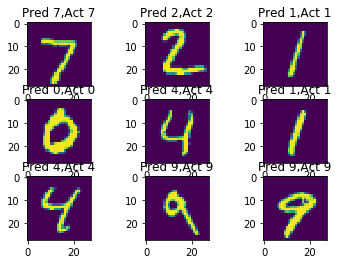

In [65]:
for i, correct in enumerate(y_correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28))             
    plt.title("Pred {},Act {}".format(y_pred[correct], y_test[correct]))

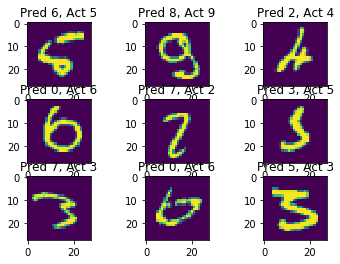

In [66]:
for i, incorrect in enumerate(y_incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28))
    plt.title("Pred {}, Act {}".format(y_pred[incorrect], y_test[incorrect]))

### CNN

In [67]:
X_train.shape

(60000, 784)

In [68]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_train.shape,X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
model2 = Sequential()

model2.add(Conv2D(32, 3, activation='relu',padding='same',input_shape=(28,28,1)))
BatchNormalization()

model2.add(Conv2D(32, 3,activation='relu',padding='same'))
model2.add(MaxPool2D(pool_size=(2,2)))
BatchNormalization()

model2.add(Conv2D(64,3,activation='relu',padding='same'))
BatchNormalization()

model2.add(Conv2D(64, 3,activation='relu',padding='same'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Flatten())
BatchNormalization()

model2.add(Dense(512,activation='relu'))
BatchNormalization()

model2.add(Dropout(0.3))
model2.add(Dense(numClasses,activation='softmax'))

In [0]:
model2.compile(loss='categorical_crossentropy', optimizer='adam')

In [45]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)             

In [0]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,height_shift_range=0.08, zoom_range=0.08)
test_gen = ImageDataGenerator()

In [0]:
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

In [48]:
model2.fit_generator(train_generator, steps_per_epoch=X_train.shape[0]//64, epochs=5,validation_data=test_generator, validation_steps=X_test.shape[0]//64)

Epoch 1/5
937/937 [==============================] - 262s 280ms/step - loss: 0.1818 - val_loss: 0.0277
Epoch 2/5
937/937 [==============================] - 259s 277ms/step - loss: 0.0590 - val_loss: 0.0318
Epoch 3/5
937/937 [==============================] - 264s 281ms/step - loss: 0.0469 - val_loss: 0.0282
Epoch 4/5
937/937 [==============================] - 258s 276ms/step - loss: 0.0389 - val_loss: 0.0205
Epoch 5/5
937/937 [==============================] - 262s 280ms/step - loss: 0.0354 - val_loss: 0.0194


In [49]:
model2.evaluate(X_test, Y_test,verbose=0)

0.019278840936767985